In [1]:
import geopandas as gpd
from pathlib import Path
import pandas as pd

In [7]:
gdf = gpd.read_file(
    r"Z:\GIS_Library\County\Kern\Kern_Parcels.shp",
    # bbox=service_boundary.total_bounds,
	# bbox=service_boundary,
)
gdf.to_parquet("data\\apns.parquet")

<Axes: >

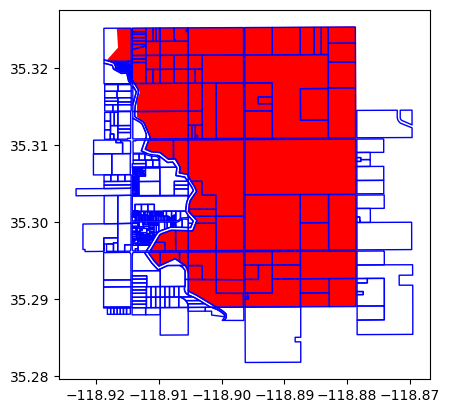

In [10]:
full_gdf = gpd.read_parquet("data\\gdf.parquet")
service_boundary = full_gdf.pipe(lambda df:df.loc[df['label'] == "Frick Unit North Service Area"])
# clip = lambda gdf: gdf.clip(service_boundary)
gdf = gpd.read_file(
    r"Z:\GIS_Library\County\Kern\Kern_Parcels.shp",
    # bbox=service_boundary.total_bounds,
	bbox=service_boundary,
).to_crs("EPSG:4326")
# service_boundary.total_bounds
# plot service boundary and gdf on top of each other

ax = service_boundary.plot(color="red")
gdf.plot(ax=ax, color="none", edgecolor="blue")
# service_boundary.plot()
# gdf.plot()

In [15]:
gdf['APN_DASH'].iloc[0]

'174-011-01'

In [11]:
gdf.to_parquet("data\\apns.parquet")

In [2]:
apn_gdf = gpd.read_parquet("data\\apns.parquet")

In [ ]:
layers = {
	"Parcels":{
		"shp":r"Z:\GIS_Library\County\Kern\Kern_Parcels",
		"color":"gray",
		"label":"APNs",
	},
	"Proposed Pipeline":{
		"shp":r"G:\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\Laterals\Frick_NorthSouth_Laterals",
		"color":"orange",
		"label":"SWSA",
	},
	"AEWSD Alignments":{
        "shp":r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\AEWSD_Alignments",
        "color":"orange",
        "label":"Name",
	},
	"District Boundary":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\AEWSD_New_boundary",
		"color":"black",
		"label":"WDNAME",
	},
	"AEWSD North Canal":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\District_canal",
		"color":"blue",
		"label":"CANAL",
	},
	"FFPPP Discharge Pipeline":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\FFPP_discharge_pipeline",
		"color":"red",
		"label":"CANAL",
	},
	"Frick Unit Service Area":{
		"shp":r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\proposed_SWSAs",
		"color":"red",
		"label":"Name",
	},
	"Proposed Turnout":{
		# "gdb":r"Z:\GIS_Library\_Clients\ArvinEdison_WSD.gdb",
		"gdb":r"\\ppeng.com\pzdata\gis\GIS_Library\_Clients\ArvinEdison_WSD.gdb",
		"layer":"turnouts",
		"color":"yellow",
		"label":"TURNOUT__",
	},
}

def get_layer(name,info):
	if "shp" in info:
		gdf = gpd.read_file(Path(info["shp"]+".shp"))
		
	elif "gdb" in info:
		gdb = Path(info["gdb"])
		gdf = gpd.read_file(gdb,layer=info["layer"])
	
	gdf["color"] = info["color"]
	gdf["label"] = gdf[info["label"]]
	gdf["layer"] = name
	
	
	return gdf[['color','label',"layer","geometry"]].to_crs(epsg=4326)

# Create gdb
gdfs = {name:get_layer(name,info) for name,info in layers.items()}

In [26]:
gdf = pd.concat(gdfs.values())
gdf.to_parquet("data\\gdf.parquet")

In [22]:
# gdf

Proposed Pipeline


,color,label,geometry
0,orange,NORTH,"LINESTRING (-118.88750 35.32172, -118.90981 35..."
1,orange,NORTH,"LINESTRING (-118.88752 35.31080, -118.90544 35..."
2,orange,NORTH,"LINESTRING (-118.88748 35.30355, -118.88297 35..."
3,orange,NORTH,"LINESTRING (-118.88748 35.29623, -118.90537 35..."
4,orange,SOUTH,"LINESTRING (-118.86956 35.28903, -118.86963 35..."


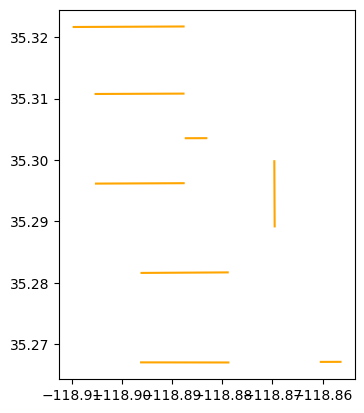

District Boundary


,color,label,geometry
0,black,ARVIN-EDISON W.S.D.,"POLYGON ((-118.87548 35.21666, -118.87555 35.2..."


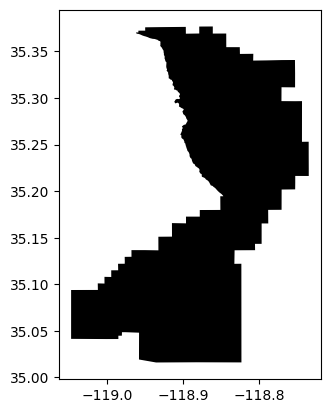

AEWSD North Canal


,color,label,geometry
0,blue,South Canal,"LINESTRING (-118.77964 35.20284, -118.77974 35..."
1,blue,Intertie Pipeline,"LINESTRING (-118.97359 35.07849, -118.97972 35..."
2,blue,Intake Canal,"LINESTRING (-118.93363 35.31725, -118.93444 35..."
3,blue,North Canal,"LINESTRING (-118.88116 35.32571, -118.87797 35..."
4,blue,SOUTH CANAL 2,"LINESTRING (-118.86141 35.12541, -118.86141 35..."


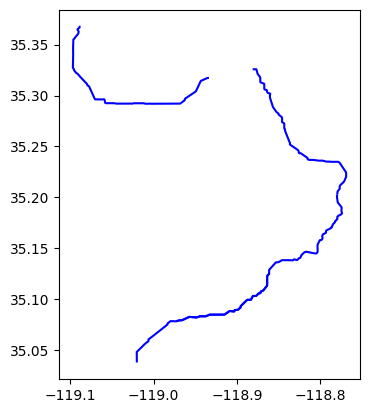

FFPPP Discharge Pipeline


,color,label,geometry
0,red,Discharge Pipeline,"LINESTRING (-118.88116 35.32568, -118.89079 35..."


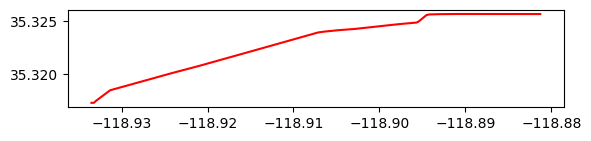

Frick Unit Service Area


,color,label,geometry
0,red,Frick Unit North Service Area,"POLYGON Z ((-118.90097 35.28894 0.00000, -118...."
1,red,Frick Unit South L2 Service Area,"POLYGON Z ((-118.87871 35.28889 0.00000, -118...."
2,red,Frick Unit South L1 Service Area,"POLYGON Z ((-118.87856 35.28912 0.00000, -118...."
3,red,Sycamore,"POLYGON Z ((-118.82393 35.17281 0.00000, -118...."
4,red,South Alignment 1 Service Area,"POLYGON Z ((-118.87781 35.10734 0.00000, -118...."


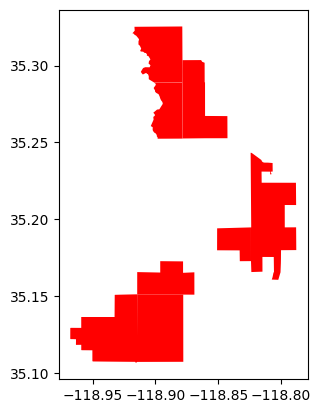

Proposed Turnout


,color,label,geometry
0,red,N8-P1,POINT (-118.86679 35.31134)
1,red,N8-P2,POINT (-118.84443 35.31126)
2,red,N8-P3,POINT (-118.81720 35.31079)
3,red,N8-P4,POINT (-118.80056 35.31135)
4,red,A-62,POINT (-118.79151 35.31873)


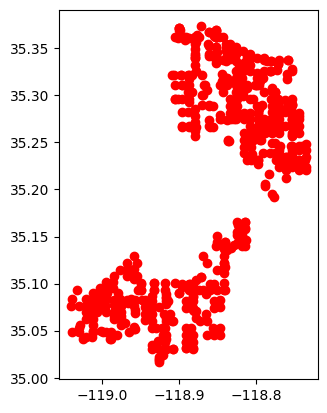

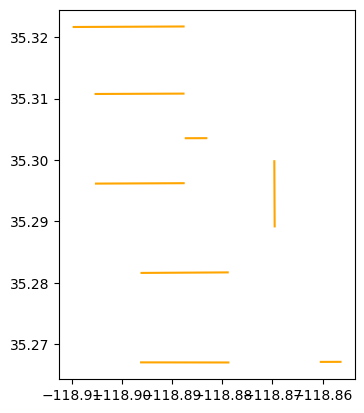

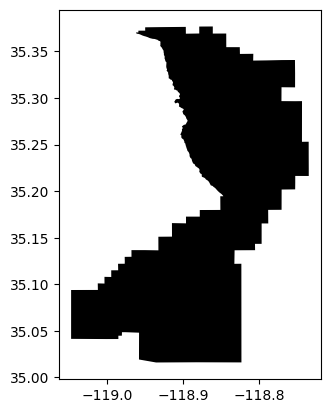

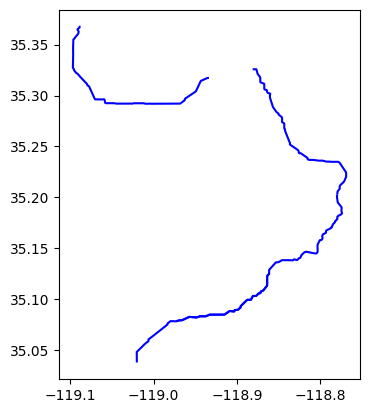

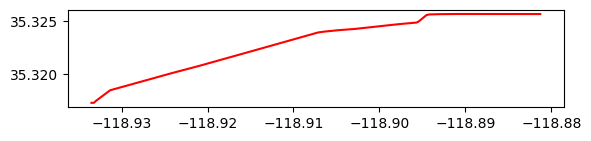

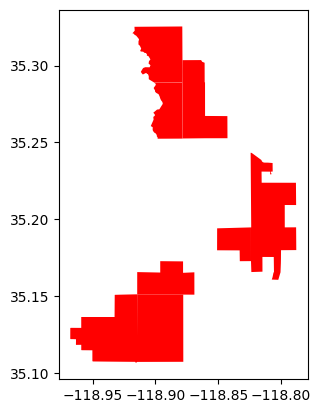

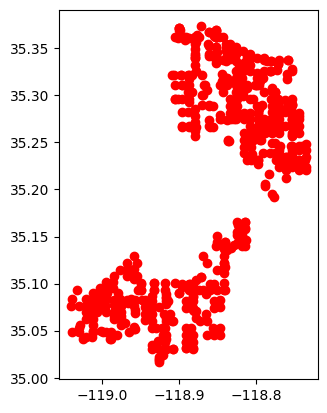

In [12]:
names = list(gdfs.keys())
from IPython.display import display
for name in names:
	print(name)
	gdf = gdfs[name]
	display(gdf.head())
	display(gdf.plot(color=layers[name]["color"]).figure)
	